## A. Explore Spurious Correlations

![Superious Correlations](image.png)


This chart shows a spurious correlation between the number of master's degrees awarded in communication and journalism in the United States and the amount of solar power generated in Malta from 2012 to 2021, with both lines increasing so similarly that they produce an extremely high correlation of r = 0.987 and if this relationship were actually real, it would mean that graduating more journalism students could directly raise a country's solar energy output, which would completely change how nations think about renewable energy development because governments could boost clean energy simply by investing in communication programs instead of building solar infrastructure, but in reality the two trends rise for unrelated reasons more students choosing media fields and Malta expanding solar production due to technology, policy, and cost reductions making this correlation meaningless despite how convincing it looks.


## B. Learning after exploring spurious correlations

### Learning from Spurious Correlations
The key learning is that a strong correlation does not prove any real cause effect relationship, especially when both variables simply move upward or downward over time for independent reasons. Statistical significance alone is not enough and without a logical or scientific explanation, the correlation is useless.

### Likelihood in Real Datasets
Spurious correlations are very common in real datasets, especially in time-series data or when many variable pairs are tested at once. When the dataset is large or many comparisons are made, random patterns will often appear 'significant' even though they have no real meaning.

### Identifying Wrong Correlations
These false relationships can be spotted by checking if there is any reasonable mechanism that connects the variables, controlling for obvious confounders like time trends, testing whether the correlation holds in different periods or datasets, and confirming that the supposed cause actually comes before the effect. If the connection does not make logical or domain sense, the correlation should be treated as misleading.


## C. Explore real datasets on Kaggle and create a new spurious correlation

For this analysis, I will use two completely unrelated datasets from Kaggle to create a spurious correlation:

1. [Global Internet Users](https://www.kaggle.com/datasets/ashishraut64/internet-users)
2. [Carbon Dioxide Emissions of the World (1990-2018)](https://www.kaggle.com/datasets/ankanhore545/carbon-dioxide-emissions-of-the-world)

These datasets have no logical causal connection, but since both variables have increased over time due to independent factors (technological advancement and industrial growth respectively), they are likely to show a strong correlation.

Variables used are: 
1. Global CO2 Emissions (measured in MtCO₂e)
2. Number of Internet Users

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np 

In [2]:
co2_data = pd.read_csv('historical_emissions.csv')
internet_data = pd.read_csv('Final.csv')

In [3]:
print(co2_data.columns)
co2_data.head()

Index(['Country', 'Data source', 'Sector', 'Gas', 'Unit', '2018', '2017',
       '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999',
       '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990'],
      dtype='object')


,Country,Data source,Sector,Gas,Unit,2018,2017,2016,2015,2014,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,CAIT,Total including LUCF,CO2,MtCO₂e,36441.55,35588.70,35160.60,34521.91,34558.59,...,24957.30,24895.32,25292.92,24214.92,23890.22,23260.29,23124.00,22988.29,23056.40,22849.92
1,China,CAIT,Total including LUCF,CO2,MtCO₂e,9663.36,9367.67,9164.21,9120.27,9184.77,...,2799.84,2882.75,2779.27,2715.50,2735.48,2414.50,2294.12,2068.77,1952.78,1823.96
2,United States,CAIT,Total including LUCF,CO2,MtCO₂e,4749.57,4581.90,4656.84,4563.52,4683.35,...,5191.66,5172.06,5129.29,4864.46,4708.31,4654.52,4581.76,4461.62,4389.50,4426.40
3,European Union (27),CAIT,Total including LUCF,CO2,MtCO₂e,2636.99,2692.12,2669.54,2321.61,2263.78,...,3079.46,3134.03,3142.23,3210.93,3113.68,3060.09,3072.40,3133.06,3247.48,3286.44
4,India,CAIT,Total including LUCF,CO2,MtCO₂e,2400.25,2267.16,2149.01,2085.38,2072.03,...,683.00,618.73,600.38,555.60,519.98,466.79,431.31,409.09,386.17,341.32


In [4]:
print(internet_data.columns)
internet_data.head()

Index(['Unnamed: 0', 'Entity', 'Code', 'Year', 'Cellular Subscription',
       'Internet Users(%)', 'No. of Internet Users', 'Broadband Subscription'],
      dtype='object')


,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,0,Afghanistan,AFG,1980,0.0,0.0,0,0.0
1,1,Afghanistan,AFG,1981,0.0,0.0,0,0.0
2,2,Afghanistan,AFG,1982,0.0,0.0,0,0.0
3,3,Afghanistan,AFG,1983,0.0,0.0,0,0.0
4,4,Afghanistan,AFG,1984,0.0,0.0,0,0.0


In [5]:
co2_world = co2_data[co2_data['Country'] == 'World'].iloc[0]

# Extract years 1990-2018
years = [str(year) for year in range(1990, 2019)]
co2_values = [co2_world[year] for year in years]

co2_df = pd.DataFrame({
    'Year': range(1990, 2019),
    'CO2_Emissions': co2_values
})
co2_df.head()

,Year,CO2_Emissions
0,1990,22849.92
1,1991,23056.40
2,1992,22988.29
3,1993,23124.00
4,1994,23260.29


In [6]:
# Prepare Internet data for World 
internet_world = internet_data[internet_data['Entity'] == 'World']
internet_world = internet_world[['Year', 'No. of Internet Users']].copy()
internet_world = internet_world[(internet_world['Year'] >= 1990) & 
                                 (internet_world['Year'] <= 2018)]
internet_world.head()

,Year,No. of Internet Users
8713,1990,2617438
8714,1991,4280727
8715,1992,6885825
8716,1993,9978025
8717,1994,20372971


In [7]:
# Merge datasets
merged_data = pd.merge(co2_df, internet_world, on='Year')
merged_data = merged_data.dropna()  # Remove any missing values

print(f'Number of records: {len(merged_data)}')
merged_data.head()

Number of records: 29


,Year,CO2_Emissions,No. of Internet Users
0,1990,22849.92,2617438
1,1991,23056.40,4280727
2,1992,22988.29,6885825
3,1993,23124.00,9978025
4,1994,23260.29,20372971


In [8]:
# Calculate correlation
correlation = merged_data['CO2_Emissions'].corr(merged_data['No. of Internet Users'])
print(f'\nCorrelation coefficient: r = {correlation:.4f}')


Correlation coefficient: r = 0.9678


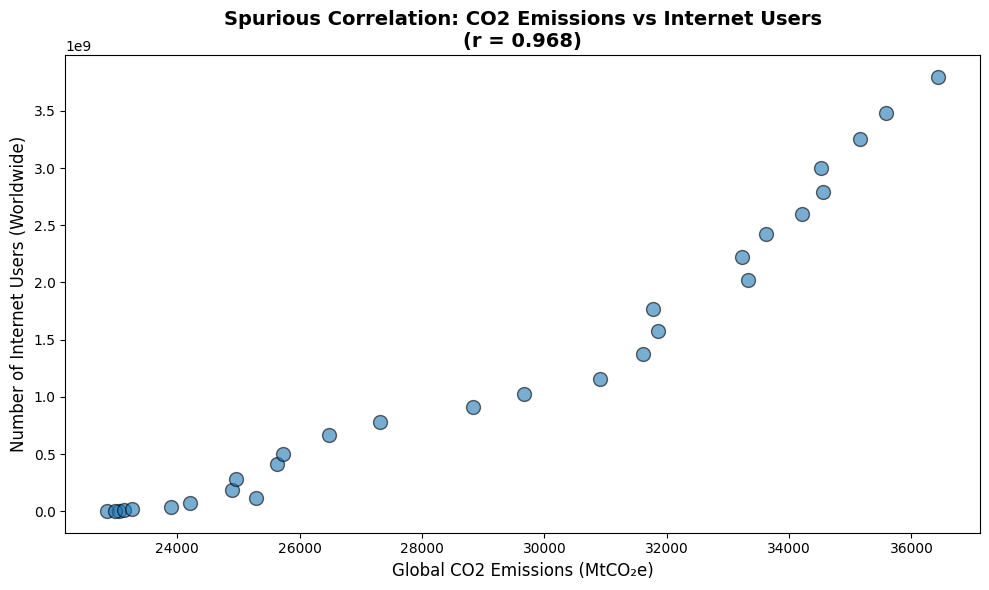

In [9]:
# 5. Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['CO2_Emissions'], merged_data['No. of Internet Users'], 
            s=100, alpha=0.6, edgecolors='black')
plt.xlabel('Global CO2 Emissions (MtCO₂e)', fontsize=12)
plt.ylabel('Number of Internet Users (Worldwide)', fontsize=12)
plt.title(f'Spurious Correlation: CO2 Emissions vs Internet Users\n(r = {correlation:.3f})', 
          fontsize=14, fontweight='bold')
plt.tight_layout()

In [10]:
print(f'Number of records: {len(merged_data)}')
print(f'Time period: 1990-2018')
print(f'Correlation coefficient: r = {correlation:.4f}')
print('_' * 100)
print(
'''\nInterpretation:
This correlation is spurious because there is no causal relationship
between CO2 emissions and internet users. Both variables increased
over time due to independent factors like industrialization or economic growth
for CO2, and technological advancement for internet adoption.'''
)

Number of records: 29
Time period: 1990-2018
Correlation coefficient: r = 0.9678
____________________________________________________________________________________________________

Interpretation:
This correlation is spurious because there is no causal relationship
between CO2 emissions and internet users. Both variables increased
over time due to independent factors like industrialization or economic growth
for CO2, and technological advancement for internet adoption.


## D. Create a 95% confidence level of the correlation

In [11]:
# Calculate Pearson correlation and p-value
r, p_value = pearsonr(merged_data['CO2_Emissions'], merged_data['No. of Internet Users'])

print(f"\nCorrelation Coefficient: r = {r:.4f}")
print(f"P-value: {p_value:.6f}")

n = len(merged_data)
z = np.arctanh(r)  
se = 1 / np.sqrt(n - 3) 
z_critical = 1.96 # for 95% confidence

# CI for Z
z_lower = z - z_critical * se
z_upper = z + z_critical * se

# Transform back to r
r_lower = np.tanh(z_lower)
r_upper = np.tanh(z_upper)

print(f"\n95% Confidence Interval: [{r_lower:.4f}, {r_upper:.4f}]")


Correlation Coefficient: r = 0.9678
P-value: 0.000000

95% Confidence Interval: [0.9319, 0.9850]


In [12]:
print(f"Correlation (r): {r:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"95% CI: [{r_lower:.4f}, {r_upper:.4f}]")
print()

if p_value < 0.05:
    print("The correlation is statistically significant (p < 0.05).")
else:
    print("The correlation is not statistically significant (p >= 0.05).")

print("\nNote:")
print("This correlation is spurious. A strong or significant correlation does not prove any causal relationship.")

Correlation (r): 0.9678
P-value: 0.000000
95% CI: [0.9319, 0.9850]

The correlation is statistically significant (p < 0.05).

Note:
This correlation is spurious. A strong or significant correlation does not prove any causal relationship.


## E. Bootstrapping 

In [13]:
np.random.seed(42)
n_bootstrap = 1000
bootstrap_correlations = []

In [14]:
for i in range(n_bootstrap):
    idx = np.random.choice(len(merged_data), size=len(merged_data), replace=True)
    boot_r = merged_data['CO2_Emissions'].iloc[idx].corr(
                merged_data['No. of Internet Users'].iloc[idx]
            )
    bootstrap_correlations.append(boot_r)

bootstrap_correlations = np.array(bootstrap_correlations)

In [15]:
ci_lower = np.percentile(bootstrap_correlations, 2.5)
ci_upper = np.percentile(bootstrap_correlations, 97.5)

boot_mean = bootstrap_correlations.mean()
boot_std = bootstrap_correlations.std()

print(f"Observed correlation (r): {r:.4f}")
print(f"Bootstrap mean: {boot_mean:.4f}")
print(f"Bootstrap std error: {boot_std:.4f}")
print(f"Bootstrap 95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"95% CI: [{r_lower:.4f}, {r_upper:.4f}]")

Observed correlation (r): 0.9678
Bootstrap mean: 0.9682
Bootstrap std error: 0.0079
Bootstrap 95% CI: [0.9520, 0.9822]
95% CI: [0.9319, 0.9850]


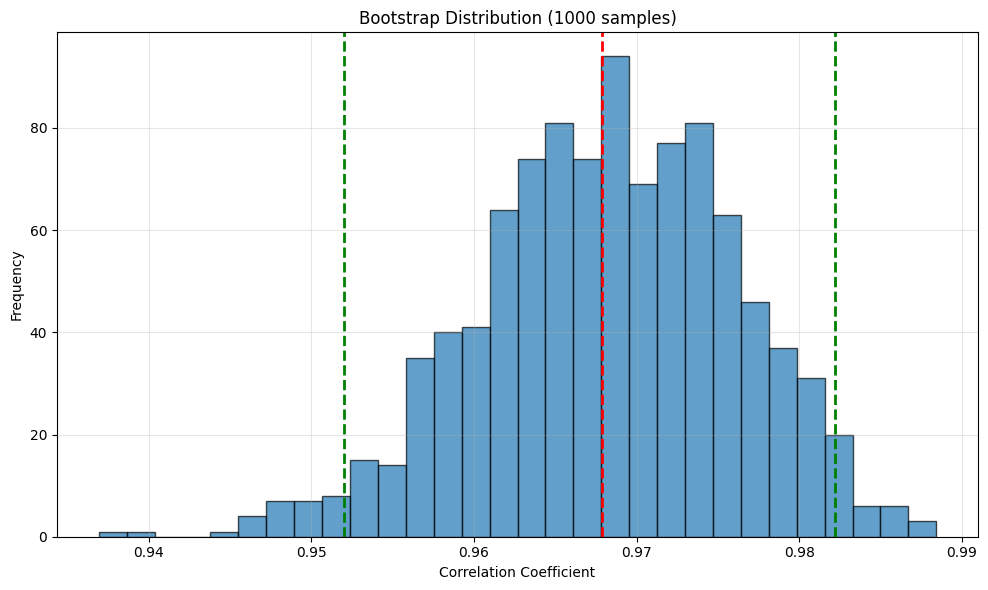

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_correlations, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(r, color='red', linestyle='--', linewidth=2)
plt.axvline(ci_lower, color='green', linestyle='--', linewidth=2)
plt.axvline(ci_upper, color='green', linestyle='--', linewidth=2)

plt.xlabel("Correlation Coefficient")
plt.ylabel("Frequency")
plt.title("Bootstrap Distribution (1000 samples)")
plt.grid(alpha=0.3)
plt.tight_layout()

In [17]:
print("Comparison of confidence intervals:")
print(f"Fisher Z width: {(r_upper - r_lower):.4f}")
print(f"Bootstrap CI width: {(ci_upper - ci_lower):.4f}")

if abs((ci_upper - ci_lower) - (r_upper - r_lower)) < 0.05:
    print("Both CI methods give similar results.")
else:
    print("CI widths differ noticeably.")

print("\nBootstrap validation:")
if ci_lower <= r <= ci_upper:
    print("Observed r lies inside the bootstrap CI.")
else:
    print("Observed r lies outside the bootstrap CI.")

print("\nWhy this matters:")
print("Bootstrapping tests how stable the correlation is across resamples.")
print("The correlation remains high, showing statistical stability.")
print("But this does NOT prove causation, both variables just rise over time.")

print("\nConclusion:")
print(f"Correlation r = {r:.4f} is statistically significant and stable.")
print("However, it is still spurious because no causal link exists.")

Comparison of confidence intervals:
Fisher Z width: 0.0531
Bootstrap CI width: 0.0302
Both CI methods give similar results.

Bootstrap validation:
Observed r lies inside the bootstrap CI.

Why this matters:
Bootstrapping tests how stable the correlation is across resamples.
The correlation remains high, showing statistical stability.
But this does NOT prove causation, both variables just rise over time.

Conclusion:
Correlation r = 0.9678 is statistically significant and stable.
However, it is still spurious because no causal link exists.
